# 1997-08-20 Massachusetts Waterspouts

https://www.youtube.com/watch?v=ITtI6LFlAQU&t=1907s

In [28]:
from collections import namedtuple
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir
from metpy.units import units
from metpy.plots import SkewT
import matplotlib.pyplot as plt
import metpy.calc as mpcalc

def get_skewt_data(date_str, station, sounding_hr):
    date = datetime.strptime(date_str, "%Y-%m-%d").replace(hour=sounding_hr)
    df = WyomingUpperAir.request_data(date, station)
    fields = ["pressure", "temperature", "dewpoint", "u_wind", "v_wind"]
    Parameters = namedtuple("SkewTParameters", "p T Td u v")
    params_list = [df[f].values*units(df.units[f]) for f in fields]
    return Parameters(*params_list)

def create_skewt_plot(date_str, station, sounding_hr):
    # create plot
    fig = plt.figure(figsize=(7,7))
    skew = SkewT(fig)
    skew.plot_dry_adiabats()
    skew.plot_moist_adiabats()
    skew.plot_mixing_lines()
    plt.title(f"STATION: {station}    DATE: {date_str}    HOUR: {sounding_hr}Z")
    
    # plot the data
    params = get_skewt_data(date_str, station, sounding_hr)
    skew.plot(params.p, params.T, 'red')
    skew.plot(params.p, params.Td, 'green')
    parcel = mpcalc.parcel_profile(params.p, params.T[0], params.Td[0])
    skew.plot(params.p, parcel, 'black', ls="--")
    skew.shade_cape(params.p, params.T, parcel)
    skew.shade_cin(params.p, params.T, parcel)
    skew.plot_barbs(params.p, params.u, params.v)
    lcl_p, _ = mpcalc.lcl(params.p[0], params.T[0], params.Td[0])
    cape, _ = mpcalc.cape_cin(params.p, params.T, params.Td, parcel)
    fig.text(.6,.8, f"LCL: {round(lcl_p,2)}\nCAPE: {round(cape,2)}")

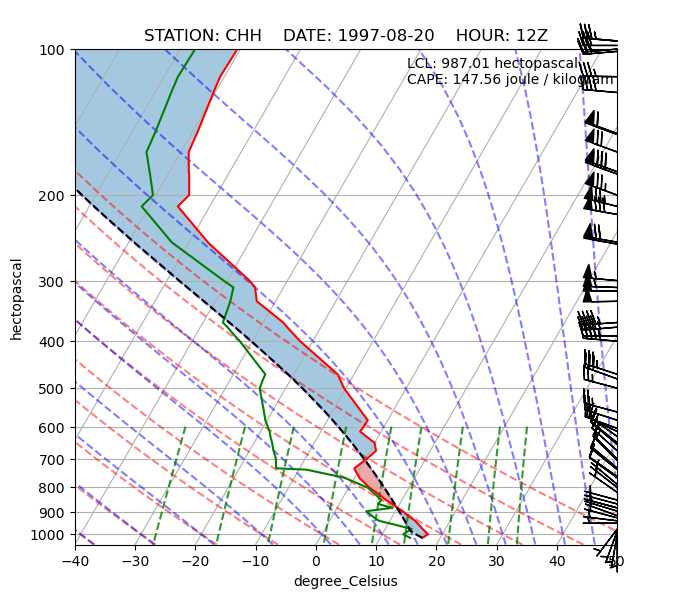

In [29]:
date_str = "1997-08-20"
station = "CHH"
sounding_hr = 12

create_skewt_plot(date_str, station, sounding_hr)

# Analysis of CHH Skew T on 1997-08-20

* LCL=987 mb
* CAPE=147 J/kg
* Weak veering shear thus weak WAA
* Sea breeze baroclinicity or SST's driven?